<a href="https://colab.research.google.com/github/emgifford/Post-Graduate-Certificate-in-Data-Science-and-Business-Analytics/blob/main/Emily_Gifford_ENews_Express_Learner_Notebook_5BFull_Code_Version_5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

The executives at E-News Express have noticed a downward trend in monthly subscribers. Accordingly, the executives have surmised that the culprit may be the seemingly outdated landing page, of which they believe does not pique visitors' interests enough in terms of relevant content; thus the visitors do not subscribe.  

As such, the design team at E-News Express has created and implemented a new landing page supposedly with more relevant content. However, the new landing page's effectiveness in ultimately gaining more subscribers needs testing.

*Statistical analysis will be used to uncover insights regarding the landing page's effectiveness.*

Specific questions are to be addressed: 

1.   Do the users spend more time on the new landing page than on the existing landing page?
2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?




Per E-News Express, **data values** are defined with the following: 
(data dictionary) 

*   **user_id** - Unique user ID of the person visiting the website
*   **group** - Whether the user belongs to the first group (control) or the second group (treatment)
*   **landing_page** - Whether the landing page is new or old
*   **time_spent_on_the_page** - Time (in minutes) spent by the user on the landing page
*   **converted** - Whether the user gets converted to a subscriber of the news portal or not
*   **language_preferred** - Language chosen by the user to view the landing page













## Import all the necessary libraries

In [ ]:
#importing libraries needed 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
#loading the data from google colab into a dataframe for analysis 
from google.colab import drive 
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/My Drive/Business Statistics/Project 2/abtest.csv')
df.head()

Mounted at /content/drive


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df.head() #viewing the first rows of the dataset 

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail() #viewing the last few rows of the dataset 

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
df.shape
#there are 100 rows and 6 columns

(100, 6)

In [ ]:
df.info() #there is both numerical and categorical data, most is categorical 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.describe() #statistical summary for numerical values

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
df.describe(include='object') #statistical summary of categorical/non-numerical values

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [ ]:
df.duplicated().sum() #there are no duplicated values as indicated by the 0 sum 

0

In [ ]:
df.isnull().sum() #there are no missing values (no NaN)

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Univariate Analysis

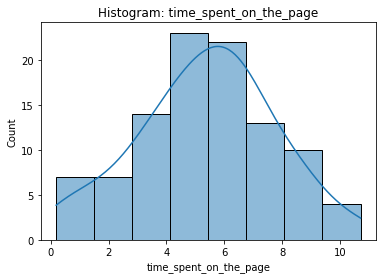

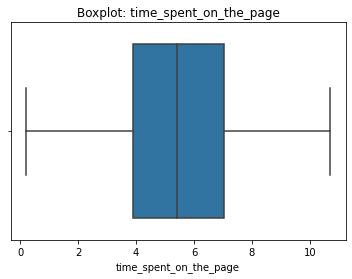

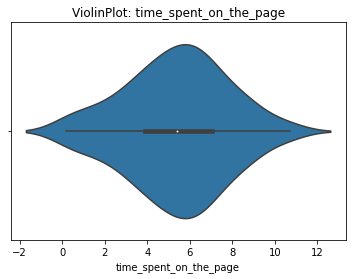

In [ ]:
#time_spent_on_page univariate analysis
plt.title("Histogram: time_spent_on_the_page")
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.show()


plt.title("Boxplot: time_spent_on_the_page")
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

plt.title("ViolinPlot: time_spent_on_the_page")
sns.violinplot(data=df,x='time_spent_on_the_page')
plt.show()



Looks pretty normally distributed, most frequent time is around 5 

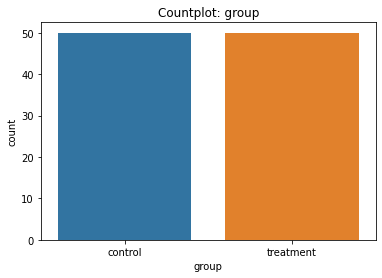

control      50
treatment    50
Name: group, dtype: int64

In [ ]:
#count plot of group: control to treatment
plt.title("Countplot: group")
sns.countplot(data=df, x= 'group');
plt.show()
#even control and treatment appears 50-50
df.group.value_counts() #let's check to make sure it's 50-50;

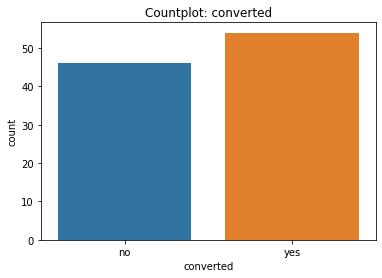

yes    54
no     46
Name: converted, dtype: int64

In [ ]:
#count plot of converted 
plt.title("Countplot: converted")
sns.countplot(data=df, x= 'converted');
plt.show()
df.converted.value_counts() #let's check the exact amounts; 54 yes, 34 no 

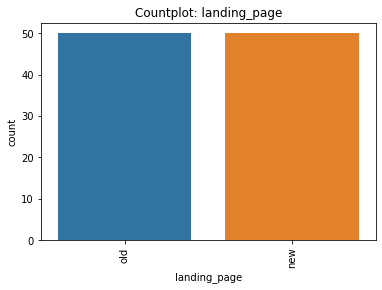

old    50
new    50
Name: landing_page, dtype: int64

In [ ]:
#count plot of landing_page 
plt.title("Countplot: landing_page")
sns.countplot(data=df, x= 'landing_page');
plt.xticks(rotation=90);
plt.show()
#appears 50-50
df.landing_page.value_counts() #let's check the exact amounts, it is 50-50 

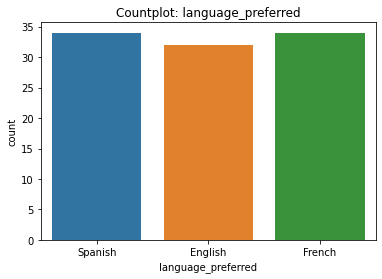

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [ ]:
#count plot of converted 
plt.title("Countplot: language_preferred")
sns.countplot(data=df, x= 'language_preferred');
plt.show()
df.language_preferred.value_counts() #Spanish and French are tied at 34, followed by a close 32 

### Bivariate Analysis

**group and time_spent_on_the_page**

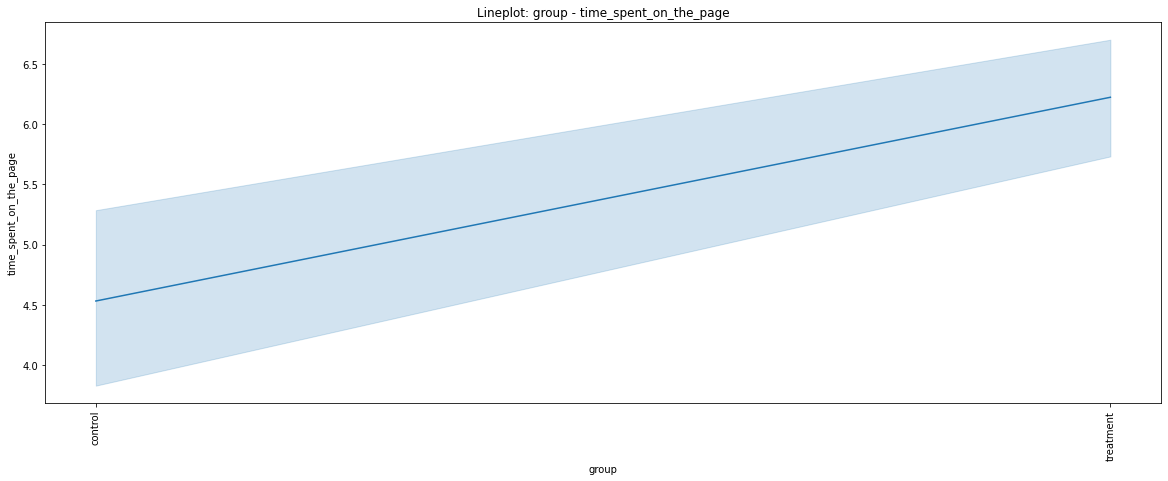

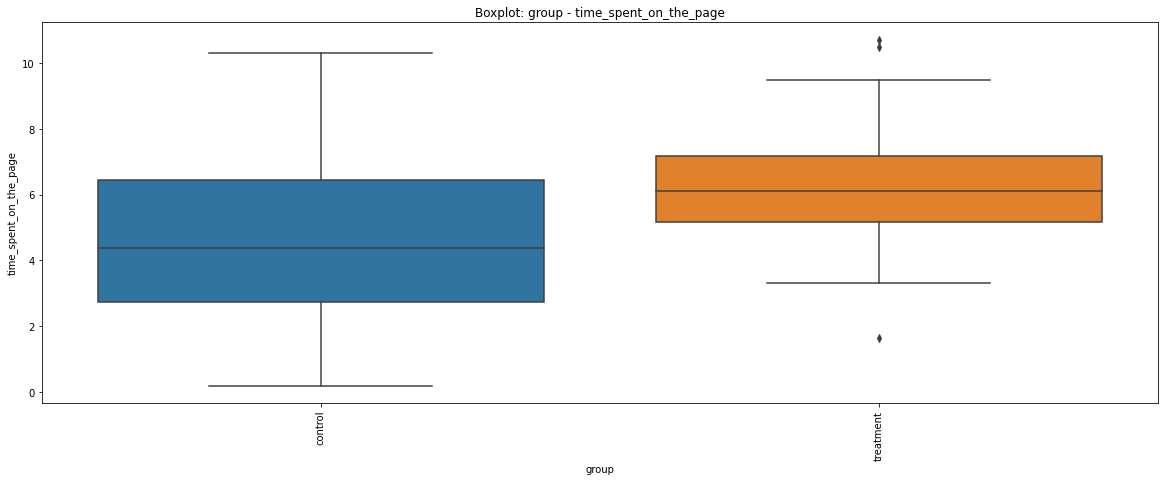

In [ ]:
#group and time spent on page 
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x= 'group', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Lineplot: group - time_spent_on_the_page")
plt.show()

plt.figure(figsize=(20,7))
sns.boxplot(data=df, x= 'group', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Boxplot: group - time_spent_on_the_page")
plt.show()


The data indicates that the time spent on page for the treatment group is greater than the control group; however there is the presence of outliers in the treatment group. 

**landing_page and time_spent_on_the_page**

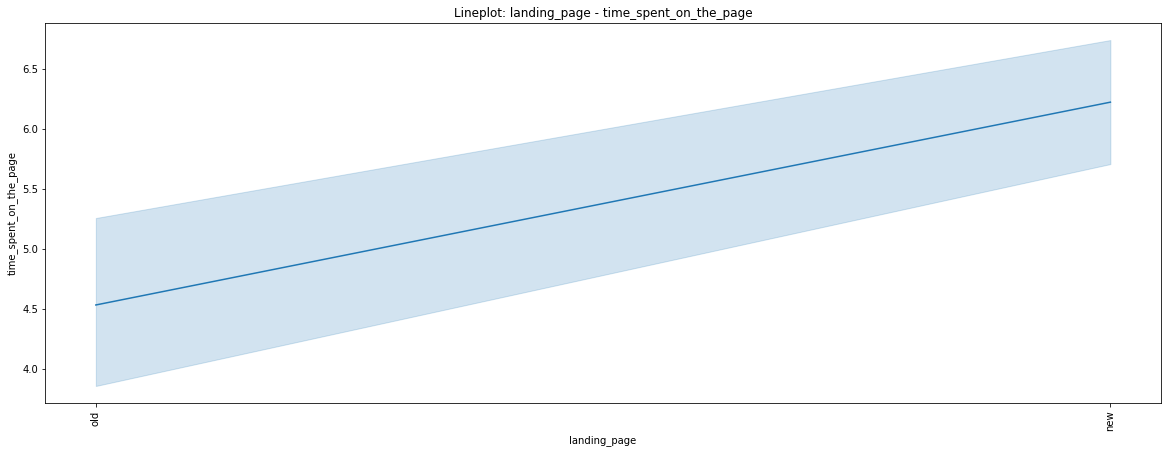

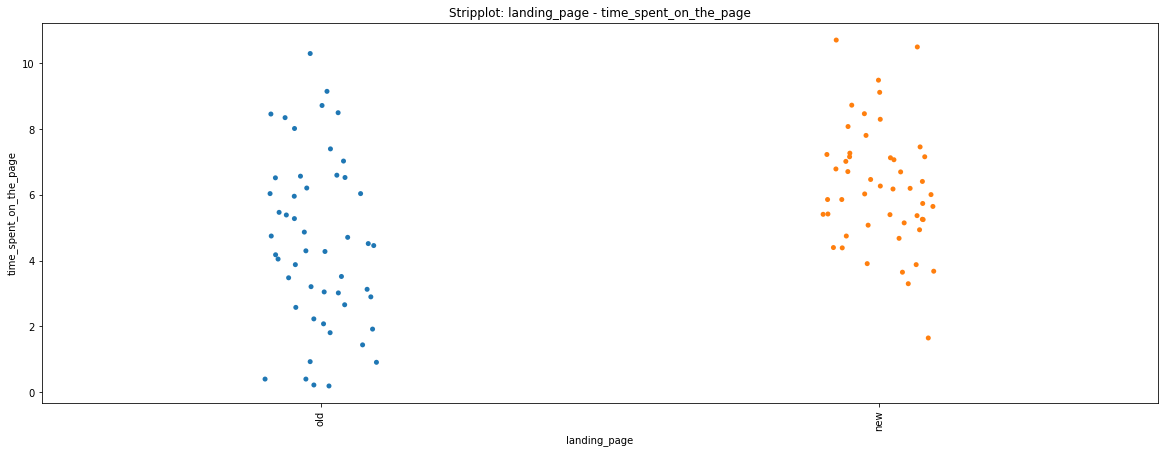

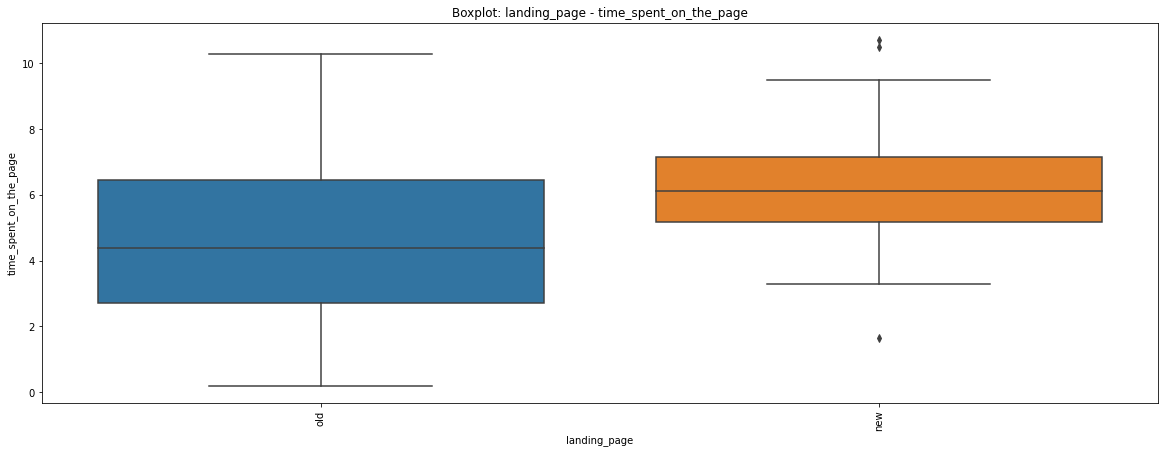

In [ ]:
#landing_page and time_spent_on_the_page
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x= 'landing_page', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Lineplot: landing_page - time_spent_on_the_page")
plt.show()

plt.figure(figsize=(20,7))
sns.stripplot(data=df, x= 'landing_page', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Stripplot: landing_page - time_spent_on_the_page")
plt.show()

plt.figure(figsize=(20,7))
sns.boxplot(data=df, x= 'landing_page', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Boxplot: landing_page - time_spent_on_the_page")
plt.show()

The data indicates that the time spent on page for the new landing page is greater than the time spent on the old landing page; however there is the presence of outliers in the new section.  

**converted and time_spent_on_the_page**

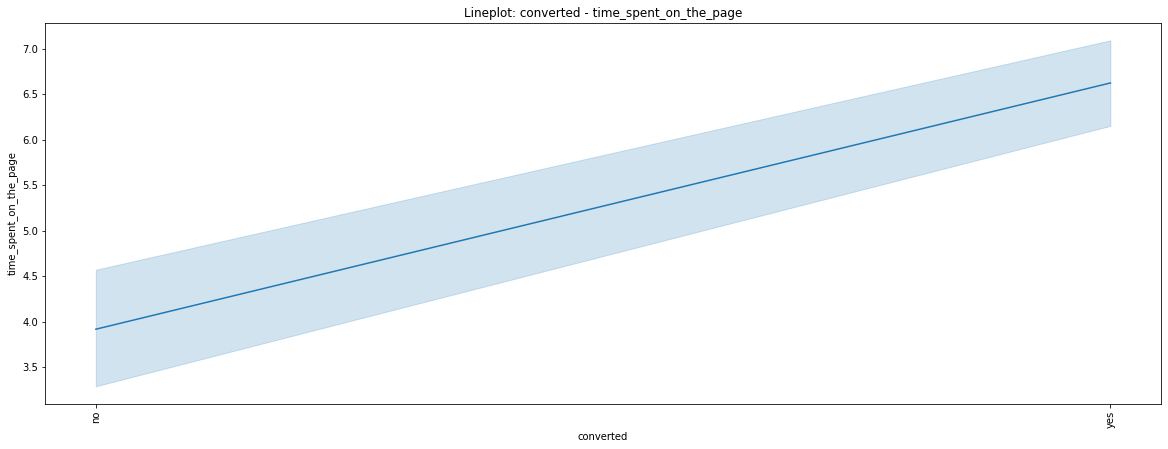

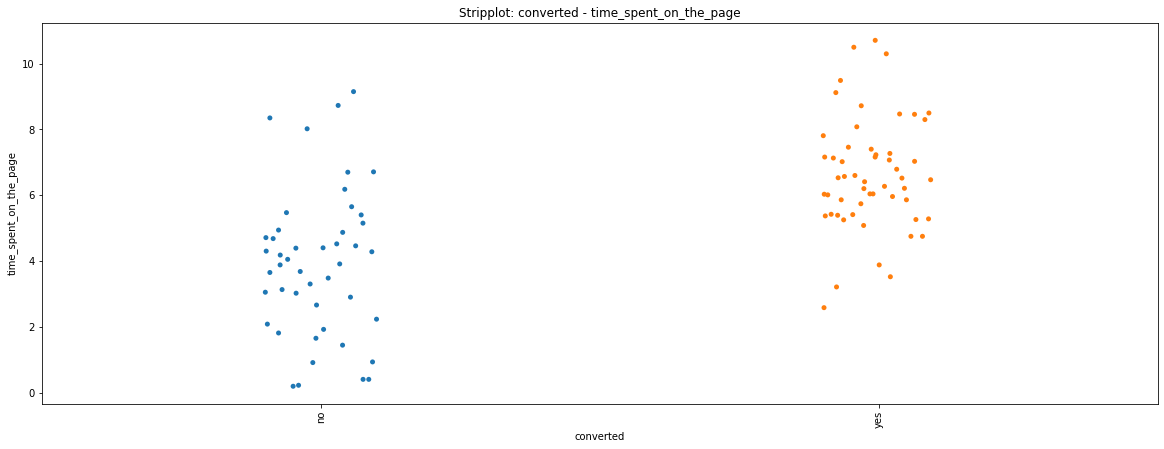

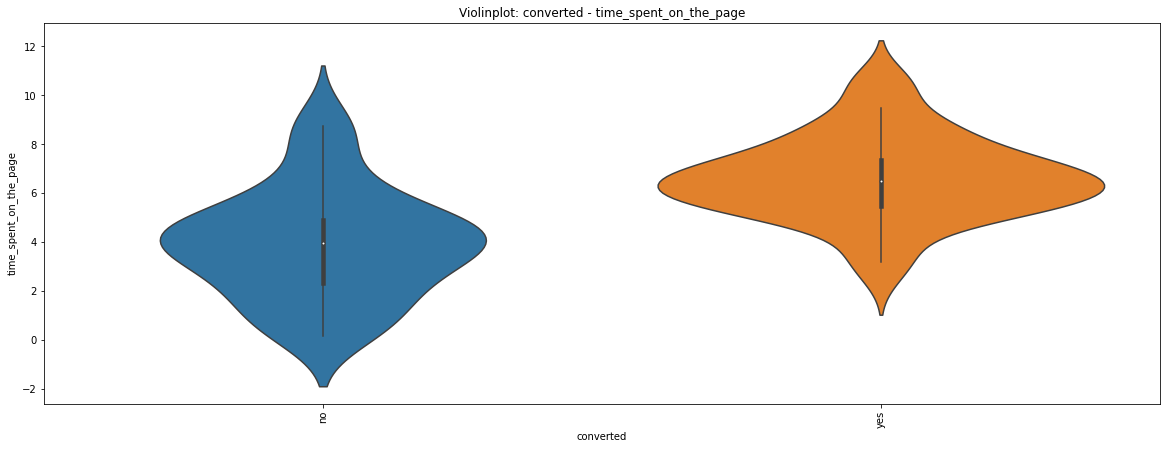

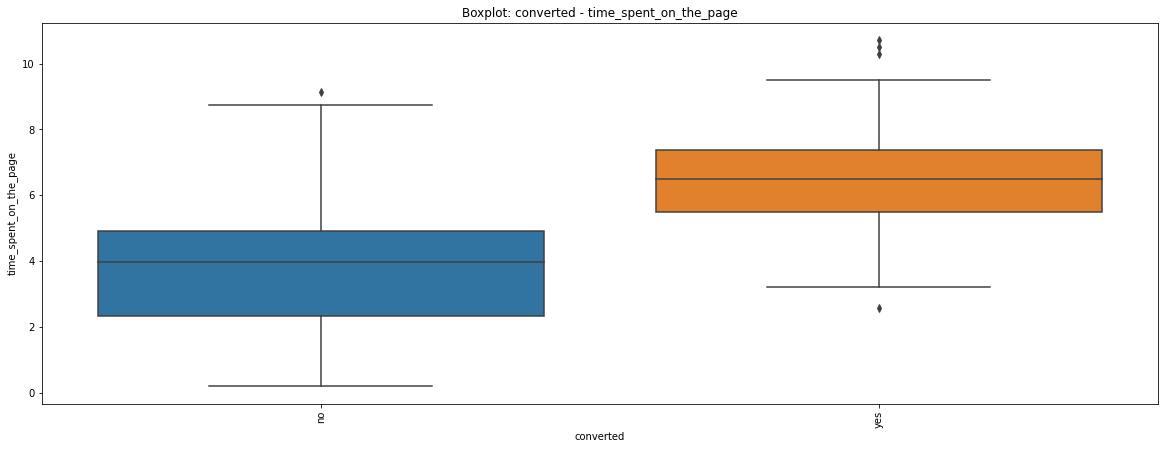

In [ ]:
#converted and time_spent_on_the_page
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x= 'converted', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Lineplot: converted - time_spent_on_the_page")
plt.show()

plt.figure(figsize=(20,7))
sns.stripplot(data=df, x= 'converted', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Stripplot: converted - time_spent_on_the_page")
plt.show()

plt.figure(figsize=(20,7))
sns.violinplot(data=df, x= 'converted', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Violinplot: converted - time_spent_on_the_page")
plt.show()


plt.figure(figsize=(20,7))
sns.boxplot(data=df, x= 'converted', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Boxplot: converted - time_spent_on_the_page")
plt.show()

There appears to be a positive correlation between time spent on the page increasing and the visitor converting. As the time spent on the landing page increases, the converted correlates to a yes. 

Time spent on page seems higher on the new landing page for converted users. 

**language preferred and time_spent_on_the_page**

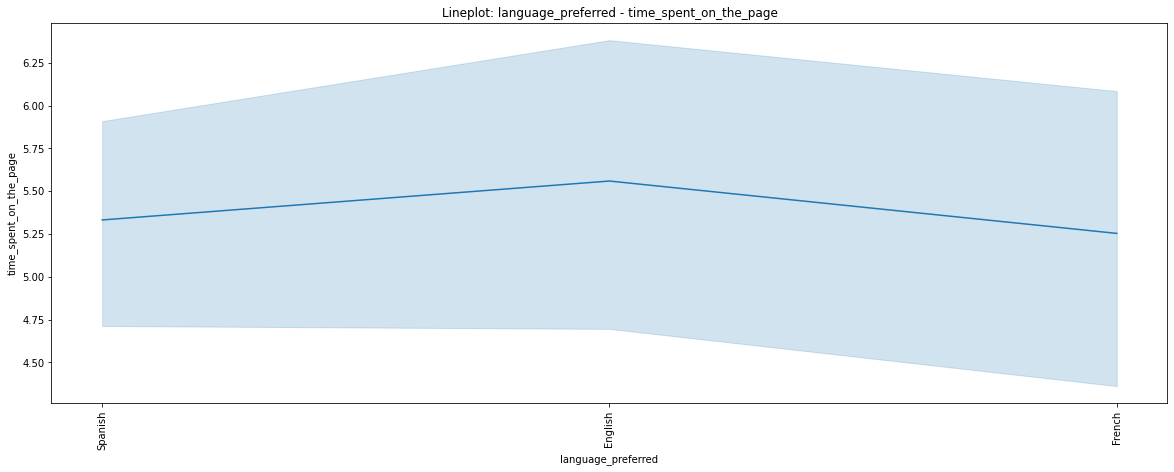

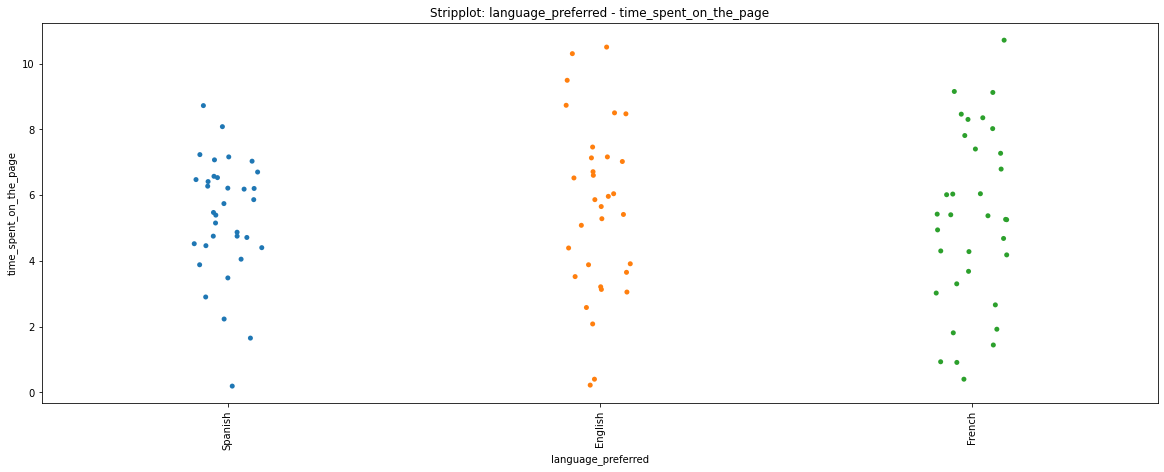

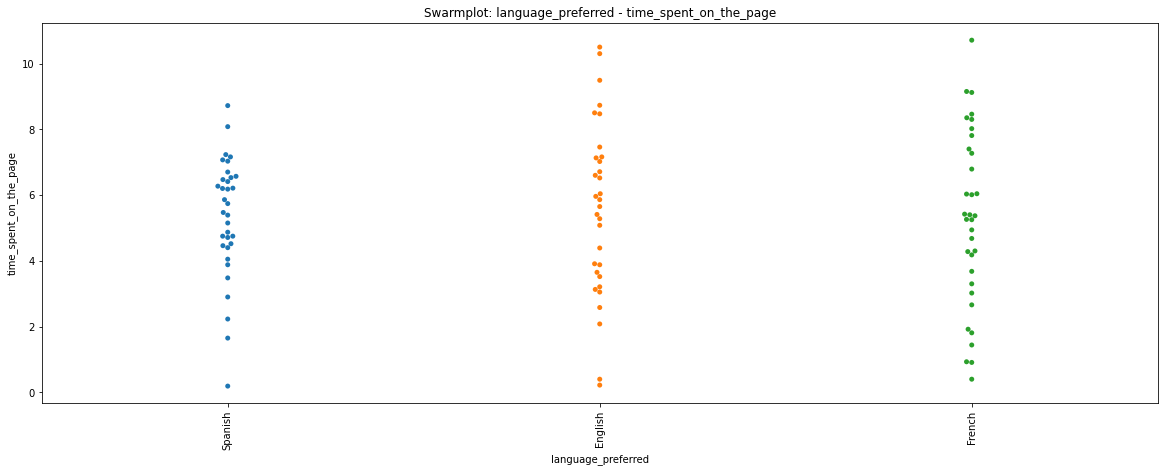

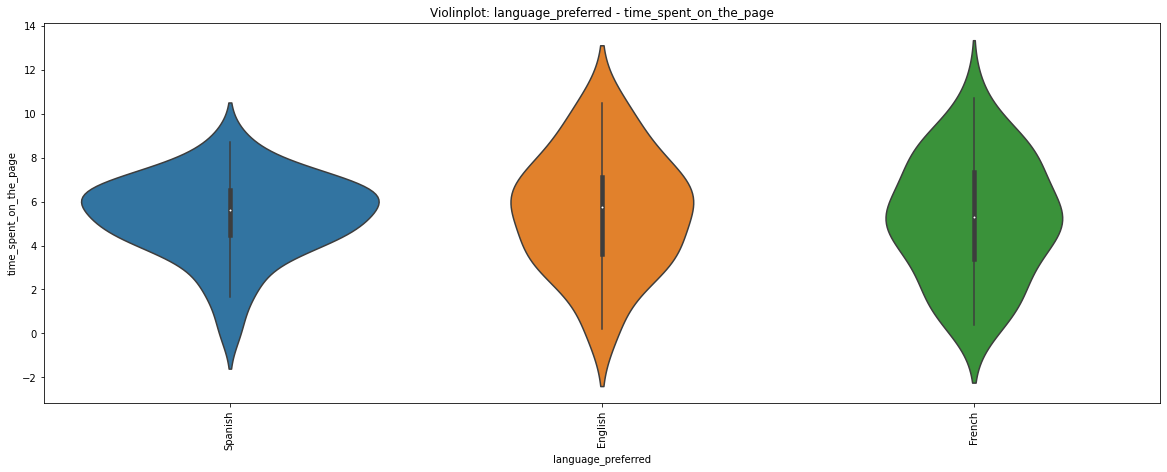

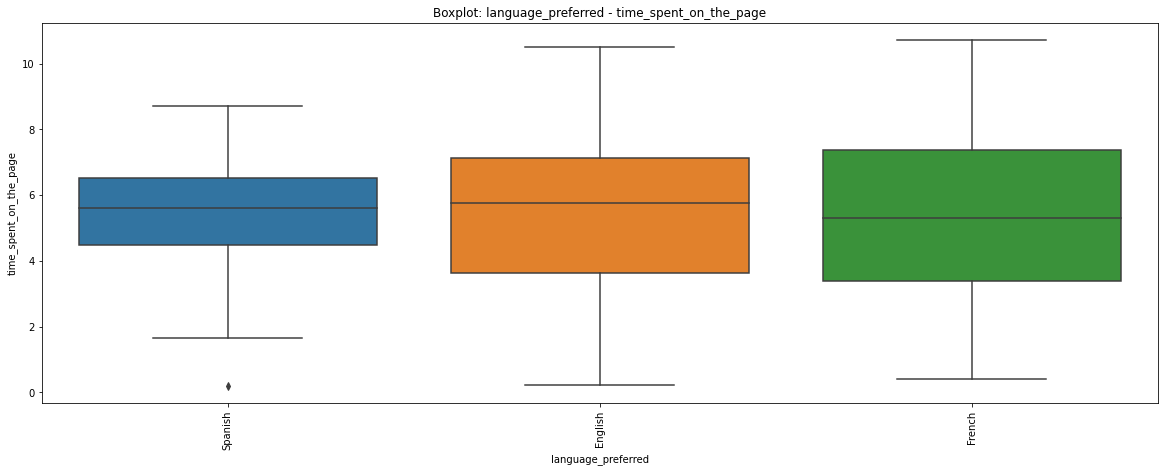

In [ ]:
#language_preferred and time_spent_on_the_page 
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x= 'language_preferred', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Lineplot: language_preferred - time_spent_on_the_page")
plt.show()

plt.figure(figsize=(20,7))
sns.stripplot(data=df, x= 'language_preferred', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Stripplot: language_preferred - time_spent_on_the_page")
plt.show()

plt.figure(figsize=(20,7))
sns.swarmplot(data=df, x= 'language_preferred', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Swarmplot: language_preferred - time_spent_on_the_page")
plt.show()
#using swarmplot too for a little more claritiy 

plt.figure(figsize=(20,7))
sns.violinplot(data=df, x= 'language_preferred', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Violinplot: language_preferred - time_spent_on_the_page")
plt.show()

plt.figure(figsize=(20,7))
sns.boxplot(data=df, x= 'language_preferred', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Boxplot: language_preferred - time_spent_on_the_page")
plt.show()

Not a whole lot of difference between these, but samples with the preferred language of English seem to have the highest time on page. The samples with Spanish as a preferred language appear to have a narrower boxplot. 

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

**landing_page and time_spent_on_the_page**

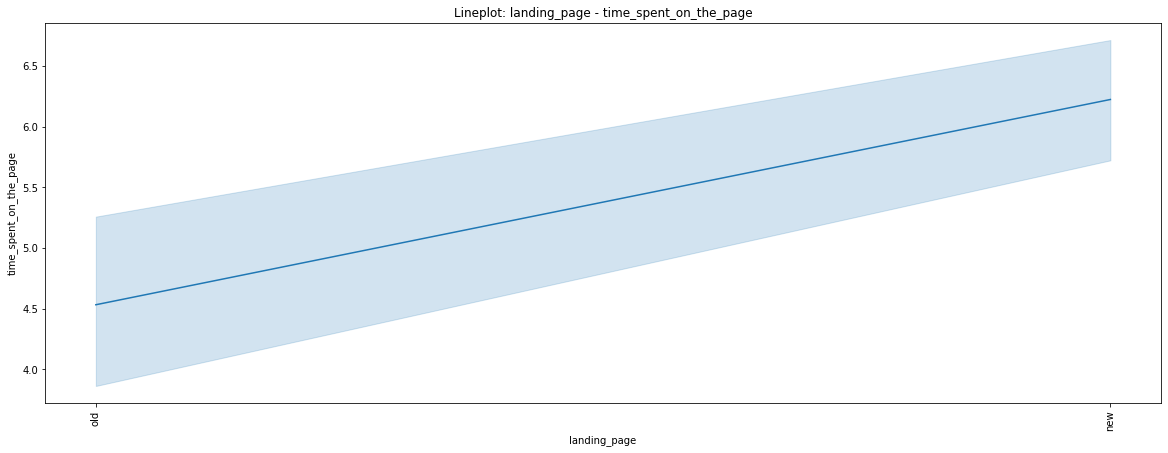

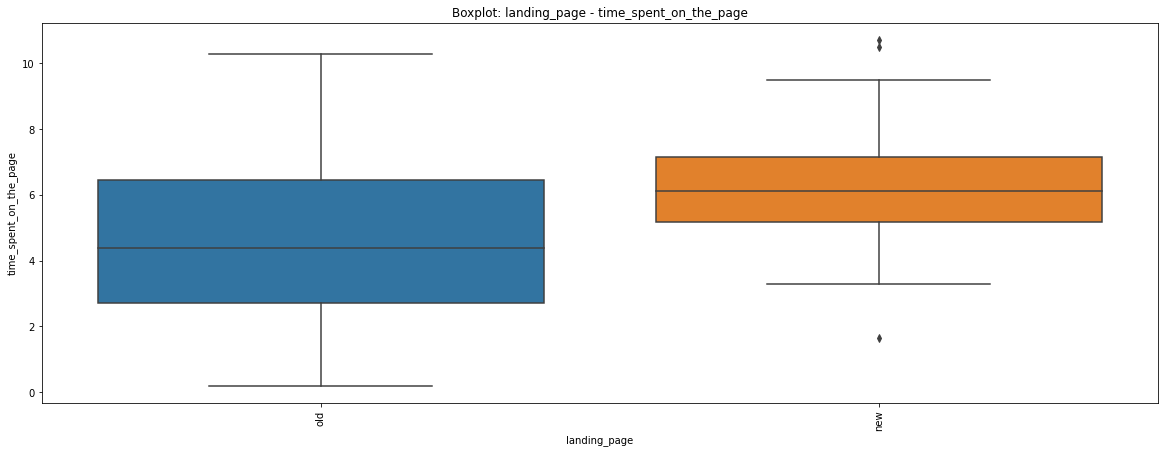

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x= 'landing_page', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Lineplot: landing_page - time_spent_on_the_page")
plt.show()

plt.figure(figsize=(20,7))
sns.boxplot(data=df, x= 'landing_page', y='time_spent_on_the_page');
plt.xticks(rotation=90);
plt.title("Boxplot: landing_page - time_spent_on_the_page")
plt.show()

As explored earlier in the bivariate analysis, the data indicates that the users as a whole spend more time on the new page than the old. There are outliers though. 

### Step 1: Define the null and alternate hypotheses

H0 null hypothesis: 
*   The users do not spend more time on the new landing page than the exisiting page. 
*   Hο : μ ≤ μο

Ha alternative hypothesis:
*   The users do spend more time on the new landing page than the exisiting page. 
*   Ha: μ > μο





### Step 2: Select Appropriate test

Using one sample t-test (standard deviation unknown). The two populations are independent with two means. 

### Step 3: Decide the significance level

Will use 0.05 level of significance (i.e. alpha level, denoted by: greek letter alpha) α

### Step 4: Collect and prepare data

In [ ]:
#collecting and preparing data for analysis
new_time = df[df['landing_page']== 'new']['time_spent_on_the_page']
old_time= df[df['landing_page']== 'old']['time_spent_on_the_page']

print('The new time mean is',new_time.mean())
print('The old time mean is',old_time.mean())

print('The new time standard deviation is',new_time.std())
print('The old time standard deviation is',old_time.std())

The new time mean is 6.2232
The old time mean is 4.532400000000001
The new time standard deviation is 1.8170310387878263
The old time standard deviation is 2.581974849306046


The standard deviations are unequal 

### Step 5: Calculate the p-value

In [ ]:
#calculating the p-value 
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(new_time, old_time, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
#comparing p-value to alpha aka level of significance 0.05
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


The p-value is 0.0001392381225166549 < 0.05 (alpha)


### Step 7:  Draw inference

If the p-value is low, the null hypothesis must go.
Thus, we have enough statistical evidence to reject the null hypothesis. 

**Inference: There is enough statistical evidence to suggest that the time users spend on the new landing page is greater than the time spent on the old landing page.**

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

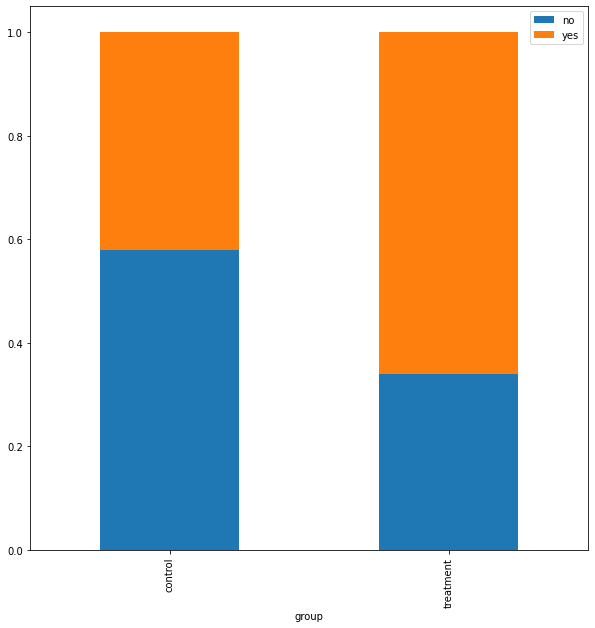

In [ ]:
#visual analysis 
pd.crosstab(df['group'],df['converted'],normalize='index').plot(kind="bar", figsize=(10,10),stacked=True)
plt.legend()
plt.show()

Visually, looks the the treatment group has more conversions, but need to do test to confirm. 

### Step 1: Define the null and alternate hypotheses

H0 null hypothesis:

*   The converstion rate for the new landing page is less than or equal to the conversion rate for the old page.

Ha alternative hypothesis: 

*   The converstion rate for the new landing page is greater than the conversion rate for the old page.

### Step 2: Select Appropriate test

Two proportion z test (2 sample z test (compare sample proportions from two independent populations)) 

### Step 3: Decide the significance level

0.05 level of significance alpha 

### Step 4: Collect and prepare data

In [ ]:
#collecting and preparing data for analysis
from pandas.core.groupby import groupby
converted_is_new_yes = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
converted_is_old_yes = df[df['group'] == 'control']['converted'].value_counts()['yes']

all_control = df.group.value_counts()['control']
all_treatment = df.group.value_counts()['treatment']

print(converted_is_new_yes, converted_is_old_yes)
print(all_treatment, all_control) 

df.info() #100 entries in dataset, was looking for "group" to create proportions, makes sense since 50+50 is 100 

33 21
50 50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
print('The proportion for converted is new yes/all treatment is', (33/50))
print('The proportion for converted is old/all control is', 21/50)

The proportion for converted is new yes/all treatment is 0.66
The proportion for converted is old/all control is 0.42


In [ ]:
print((50*(33/50)),
(50*((50-33)/50)),
(50*(21/50)),
(50*((50-21)/50)))
#seeing if assumptions are met for this type of test 
#doing calculation to see if the proportions meet greater than or equal to 10

33.0 17.0 21.0 28.999999999999996


proportions need to meet greater than or equal to 10 for assumptions 

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50\cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

Both proportions meet the critera for proportions Z-test 

### Step 5: Calculate the p-value

In [ ]:
#calculating the p-value 
from statsmodels.stats.proportion import proportions_ztest   

test_stat, p_value = proportions_ztest([converted_is_new_yes, converted_is_old_yes] , [all_treatment, all_control], alternative ='larger')  
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
#comparing p-value with the alpha aka level of significance 0.05
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


The p-value is 0.008026308204056278 < 0.05 level of significance 

### Step 7:  Draw inference

The p-value is low, thus the null hypothesis must go. We have enough statistical evidence to reject the null hypothesis. 

**Thus, there is enough statstical evidence to suggest that the converstion rate for the new landing page is greater than the conversion rate for the old page.**

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

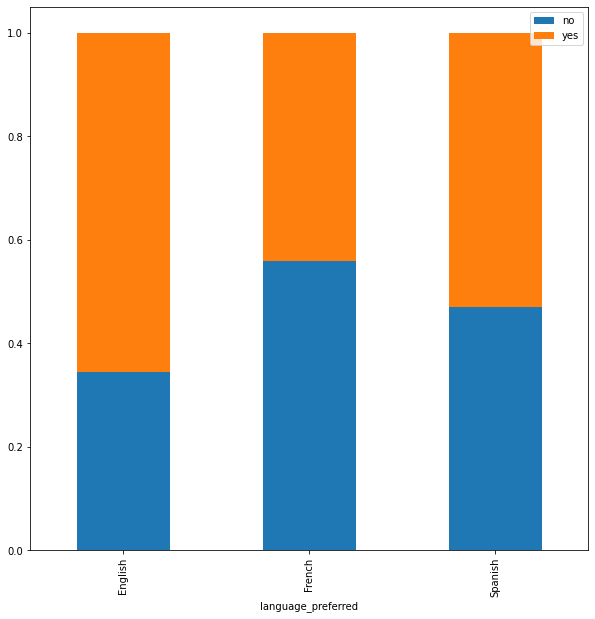

In [ ]:
#visual analysis 
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(10,10), stacked=True)
plt.legend()
plt.show()

Hard to tell if looking at the bars if this is statistically significant across the board--need statistical test. 

### Step 1: Define the null and alternate hypotheses

H0 null hypothesis:

*   The converstion rate for the new landing page is not related to (i.e. independent of) the preferred langugage. 

Ha alternative hypothesis: 

*   The converstion rate for the new landing page is is related (i.e. has dependency to) the preferred language. 

### Step 2: Select Appropriate test

Chi Square test of independence is what will be used as there are two categorical variables that need a test of independence. 

### Step 3: Decide the significance level

0.05 level of significance alpha 

### Step 4: Collect and prepare data

In [ ]:
#chi square test of independence requires a 2x2 contingency table, need to create 
contingency_table = pd.crosstab(df.language_preferred, df.converted)
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
#calculating the p-value 
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.0930306905370832
p-value = 0.2129888748754345
Degrees of freedom = 2
Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [ ]:
#comparing p-value with alpha 0.05 aka level of significance
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The p-value is high, the null hypothesis must fly. 
Inference: **There is not enough statistical evidence to reject that language preferred and converted status are independent.**

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

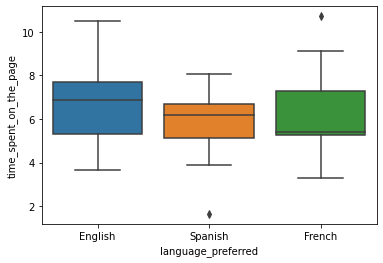

In [ ]:
#creating new dataset to filter
df_new_with_landing_page = df[df['landing_page'] == 'new']
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data = df_new_with_landing_page)
plt.show()

* The distribution of the time spent on the page among seems to differ among the three groups.
* **Need to find out for sure with a statistical test.**

In [ ]:
df_new_with_landing_page.groupby(['language_preferred'])['time_spent_on_the_page'].mean()
#finding means of language_preferred v.s. time_spent_on_the_page 

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

> $H_0$ : The mean time spent on the new page with respect to each language preferred category is equal. <br>
> $H_a$ : At least one of the mean times spent on the new page with respect to the language preferred category is different.

### Step 2: Select Appropriate test

*Assuming 0.05 level of significance. *

Will use a **one-way ANOVA test** provided normality and equality of variance assumptions are verified (which will yield more reliable results).   

Will use both both Sharpiro-Wilk's (for normality verification) and Levene (for equality of variance testing).  

**Shapiro-Wilk’s test**

𝐻0:  The mean time spent on the new page follow a normal distribution against the alternative hypothesis

𝐻𝑎:  The meant time spent on the new page do not not follow a normal distribution

In [ ]:
#finding the p-value for Shapiro-Wilk's test 
w, p_value = stats.shapiro(df_new_with_landing_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since the p-value of the test is much larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution. 

The Sharpiro-Wilk's test assumption is satisfied and the time spent on the page follows a normal distribution.

**Levene’s test**

>$H_0$: All the population variances are equal gainst the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#finding the p-value for the Levene test 
statistic, p_value = stats.levene(df_new_with_landing_page[df_new_with_landing_page['language_preferred']=='English']['time_spent_on_the_page'],
                            df_new_with_landing_page[df_new_with_landing_page['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            df_new_with_landing_page[df_new_with_landing_page['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is larger than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances. Thus, the Levene's test assuption is satisfied. 

### Step 3: Decide the significance level

again assumping a 0.05 alpha

### Step 4: Collect and prepare data

In [ ]:
time_spent_new_English = df_new_with_landing_page[df_new_with_landing_page['language_preferred']=='English']['time_spent_on_the_page']
time_spent_new_Spanish = df_new_with_landing_page[df_new_with_landing_page['language_preferred']=='Spanish']['time_spent_on_the_page']  
time_spent_new_French = df_new_with_landing_page[df_new_with_landing_page['language_preferred']=='French']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
#calculating p-value 
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_new_English, time_spent_new_Spanish, time_spent_new_French)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
#comparing the p-value with the alpha 0.05
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value of the one-way ANOVA test is greater than the level of significance, **There is not enough statistical evidence reject that the mean time spent on the new page with respect to each language preferred category is not equal.**

## Conclusion and Business Recommendations

**Conclusions**
*  There **is** enough statistical evidence to suggest that the time users spend on the new landing page is greater than the time spent on the old landing page.
*   There **is** enough statistical evidence to suggest that the converstion rate for the new landing page is greater than the conversion rate for the old page.
*   There **is not** enough statistical evidence to reject that language preferred and converted status are independent.
*   There **is not** enough statistical evidence reject that the mean time spent on the new page with respect to each language preferred category is not equal.















___

**Business Recommendations**

*   From the data, it appears the effort (and likely time and money) spent crafting and implementing a new landing page was worth it in regards to effectively increasing users' time spent on the page and boosting conversion rates.   
*   Yet, further investigation is needed regarding language preferred and converted status along with the equality/inequality of the mean time spent on the new page with respect to each language preferred. (It is worth noting that this lack of evidence does not inherently prove that the effect does not exist. Again further investigation/analysis would be needed.) 









